# 1. Imports

In [235]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Dados

## 2.1. Import

In [187]:
root_path = os.path.abspath('..')
data_path = os.path.join(root_path, 'notebooks')
extra_medidas_path = os.path.join(root_path, 'extra', 'medidas_governamentais')

In [188]:
noticias_filename = 'noticias_en_classification.csv'
tweets_filename = 'tweets_en_classification.csv'
medidas_filename = 'medidas_governamentais.csv'

In [189]:
noticias_path = os.path.join(data_path, noticias_filename)
tweets_path = os.path.join(data_path, tweets_filename)
medidas_path = os.path.join(extra_medidas_path, medidas_filename)

In [190]:
noticias = pd.read_csv(noticias_path, index_col='Unnamed: 0')

In [191]:
tweets = pd.read_csv(tweets_path, index_col='Unnamed: 0').drop(columns='Unnamed: 0.1')

In [192]:
medidas = pd.read_csv(medidas_path)

## 2.2. Cleaning

### 2.2.1. NaNs

#### 2.2.1.1 Notícias

In [193]:
noticias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37593 entries, 0 to 37592
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data                      37593 non-null  object 
 1   titulo                    37593 non-null  object 
 2   descricao                 37241 non-null  object 
 3   source                    37593 non-null  object 
 4   titulo_clean              37592 non-null  object 
 5   titulo_en                 37592 non-null  object 
 6   classification            37593 non-null  object 
 7   score                     37593 non-null  float64
 8   descricao_clean           37221 non-null  object 
 9   descricao_en              37221 non-null  object 
 10  descricao_classification  37593 non-null  object 
 11  descricao_score           37593 non-null  float64
dtypes: float64(2), object(10)
memory usage: 3.7+ MB


In [194]:
index_descricao_null = noticias[noticias.descricao.isnull().values].index

In [195]:
noticias[noticias.descricao.isnull().values].source.value_counts()

publico    352
Name: source, dtype: int64

In [196]:
index_titulo_clean_null = noticias[noticias.titulo_clean.isnull().values].index

In [197]:
noticias[noticias.titulo_clean.isnull().values].source.value_counts()

observador    1
Name: source, dtype: int64

In [198]:
index_descricao_clean_null = noticias[noticias.descricao_clean.isnull().values].index

In [199]:
noticias[noticias.descricao_clean.isnull().values].source.value_counts()

publico    372
Name: source, dtype: int64

In [200]:
noticias.titulo[index_titulo_clean_null].values

array([' '], dtype=object)

In [201]:
# lets get the descricao_clean that have descricao not null
index_descricao_clean_null_weird = set(index_descricao_clean_null) - set(index_descricao_null)

In [202]:
noticias.descricao[index_descricao_clean_null_weird].values

array([' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
       ' ', ' ', ' ', ' ', ' ', ' ', ' '], dtype=object)

***
Time to remove these NaNs classifications...
***

In [203]:
noticias.loc[index_titulo_clean_null, 'classification'] = np.nan

In [204]:
noticias.loc[index_titulo_clean_null, 'score'] = np.nan

In [205]:
noticias.loc[index_descricao_clean_null, 'descricao_classification'] = np.nan

In [206]:
noticias.loc[index_descricao_clean_null, 'descricao_score'] = np.nan

***
Now lets get rid of them
***

In [207]:
noticias = noticias.dropna()

In [208]:
noticias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37220 entries, 0 to 37592
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data                      37220 non-null  object 
 1   titulo                    37220 non-null  object 
 2   descricao                 37220 non-null  object 
 3   source                    37220 non-null  object 
 4   titulo_clean              37220 non-null  object 
 5   titulo_en                 37220 non-null  object 
 6   classification            37220 non-null  object 
 7   score                     37220 non-null  float64
 8   descricao_clean           37220 non-null  object 
 9   descricao_en              37220 non-null  object 
 10  descricao_classification  37220 non-null  object 
 11  descricao_score           37220 non-null  float64
dtypes: float64(2), object(10)
memory usage: 3.7+ MB


#### 2.2.1.2. Tweets

In [209]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21140 entries, 0 to 21139
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21140 non-null  object 
 1   date            21140 non-null  object 
 2   username        21140 non-null  object 
 3   text            21140 non-null  object 
 4   hashtag         4830 non-null   object 
 5   geo             1 non-null      object 
 6   text_clean      21140 non-null  object 
 7   text_en         21140 non-null  object 
 8   classification  21140 non-null  object 
 9   score           21140 non-null  float64
dtypes: float64(1), object(9)
memory usage: 1.8+ MB


In [210]:
tweets = tweets.drop(columns=['hashtag', 'geo'])

In [211]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21140 entries, 0 to 21139
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21140 non-null  object 
 1   date            21140 non-null  object 
 2   username        21140 non-null  object 
 3   text            21140 non-null  object 
 4   text_clean      21140 non-null  object 
 5   text_en         21140 non-null  object 
 6   classification  21140 non-null  object 
 7   score           21140 non-null  float64
dtypes: float64(1), object(7)
memory usage: 1.5+ MB


### 2.2.2. Converting classification to -1/1

In [212]:
map_dict = {'NEGATIVE': -1, 'POSITIVE': 1}

In [213]:
noticias.loc[:, 'classification'] = noticias.classification.map(map_dict)
noticias.loc[:, 'descricao_classification'] = noticias.descricao_classification.map(map_dict)
tweets.loc[:, 'classification'] = tweets.classification.map(map_dict)

In [214]:
noticias.classification.value_counts()

-1    27129
 1    10091
Name: classification, dtype: int64

In [215]:
noticias.descricao_classification.value_counts()

-1    28238
 1     8982
Name: descricao_classification, dtype: int64

In [216]:
tweets.classification.value_counts()

-1    15439
 1     5701
Name: classification, dtype: int64

### 2.2.3. Converting dates to datetime objects

In [217]:
noticias['data'] = pd.to_datetime(noticias['data'], errors= "coerce").dt.tz_localize(None)

In [218]:
tweets['date'] = pd.to_datetime(tweets['date'], errors= "coerce").dt.tz_localize(None)

In [219]:
medidas['data'] = pd.to_datetime(medidas['data'], errors= "coerce", dayfirst=True).dt.tz_localize(None)

In [220]:
noticias.data.dtypes # same as datetime64[ns]

dtype('<M8[ns]')

In [221]:
tweets.date.dtypes # same as datetime[ns]

dtype('<M8[ns]')

In [222]:
medidas.data.dtypes # same as datetime[ns]

dtype('<M8[ns]')

# 3. Análise

In [223]:
medidas.groupby(pd.Grouper(key='data', freq='MS')).count()

,local,tipo,desc
data,,,
2020-03-01,32,32,32
2020-04-01,18,18,18
2020-05-01,40,40,40
2020-06-01,17,17,17
2020-07-01,13,13,13


In [227]:
tweets['weighted_classification'] = tweets.classification * tweets.score

In [229]:
noticias['weighted_classification'] = noticias.classification * noticias.score

In [230]:
noticias['weighted_desc_classification'] = noticias.descricao_classification * noticias.descricao_score

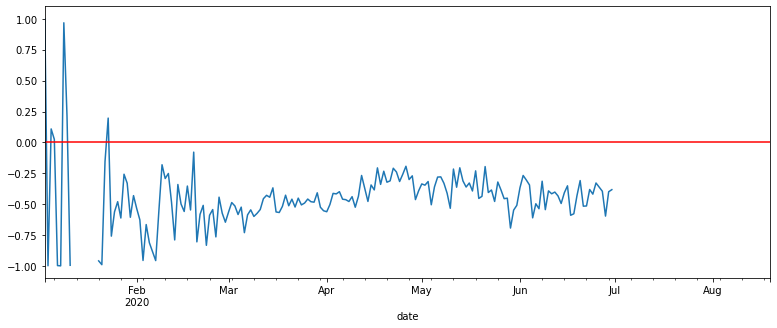

In [242]:
tweets.groupby(pd.Grouper(key='date', freq='D'))['weighted_classification'].mean().plot(figsize=(13,5),kind="line")
plt.axhline(y=0.0, color='r', linestyle='-')

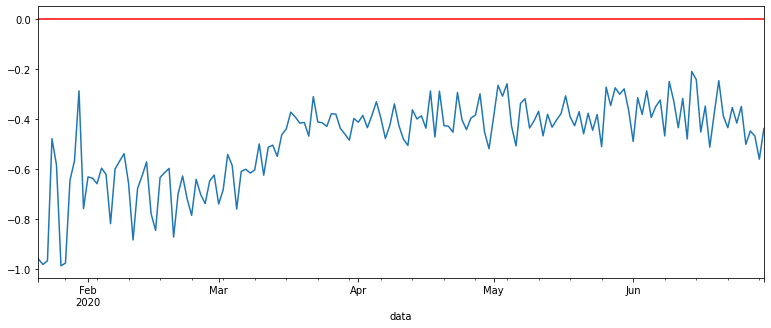

In [243]:
noticias.groupby(pd.Grouper(key='data', freq='D'))['weighted_classification'].mean().plot(figsize=(13,5),kind="line")
plt.axhline(y=0.0, color='r', linestyle='-')

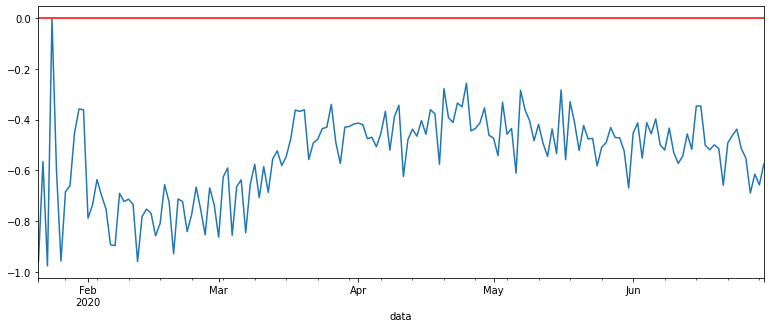

In [244]:
noticias.groupby(pd.Grouper(key='data', freq='D'))['weighted_desc_classification'].mean().plot(figsize=(13,5),kind="line")
plt.axhline(y=0.0, color='r', linestyle='-')

In [253]:
def plot_sentiment(df,
                   date_name,
                   classification_name,
                   freq,
                   agg_name='mean',
                   fig_size=(13, 5),
                   plot_type='line',
                   plot_zero_line=False):
    df.groupby(pd.Grouper(key=date_name, freq=freq))[classification_name]\
        .agg(agg_name)\
        .plot(figsize=fig_size, kind=plot_type)
    if plot_zero_line:
        plt.axhline(y=0.0, color='r', linestyle='-')

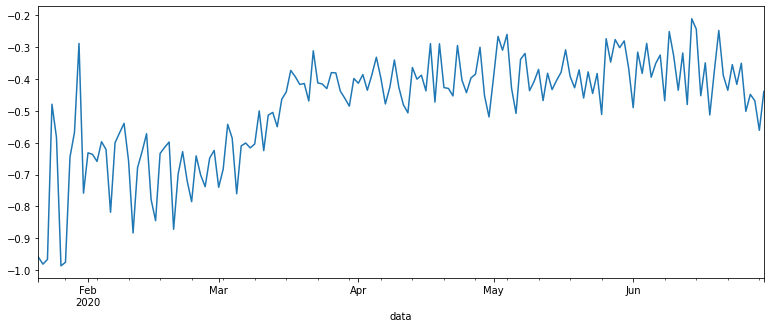

In [446]:
plot_sentiment(noticias, 'data', 'weighted_classification', 'D',)

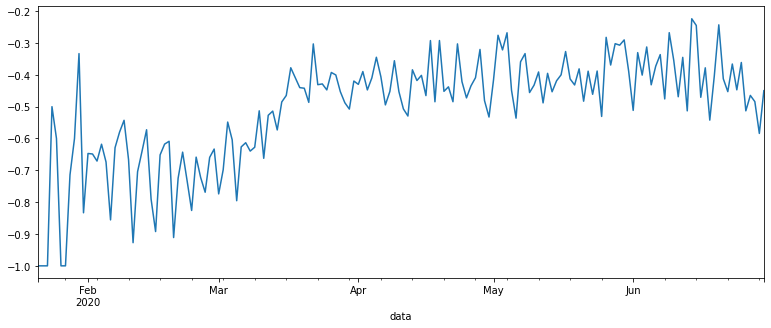

In [447]:
plot_sentiment(noticias, 'data', 'classification', 'D',)

In [353]:
np.where(df_temp.date.dt.date.values < medidas.data.dt.date.unique()[0])[0][-1]

64

In [345]:
medidas.data.dt.date.unique()[0]

datetime.date(2020, 3, 8)

In [347]:
df_temp.date.dt.date.values[66]

datetime.date(2020, 3, 9)

In [354]:
df_temp.date.dt.date.values[64]

datetime.date(2020, 3, 7)

In [366]:
def get_adjacent_dates_idx(df_date_values, date_to_find):
    if date_to_find in df_date_values:
        idx = np.where(df_date_values == date_to_find)[0][0]
        idx_before = idx - 1
        idx_after = idx + 1
    else:
        idx_before = np.where(df_date_values < date_to_find)[0][-1]
        idx_after = idx_before + 1
    return (idx_before, idx_after)

In [501]:
df_temp = tweets.groupby(pd.Grouper(key='date', freq='D'))['weighted_classification'].agg('mean').reset_index().dropna()
medidas_dates = medidas.data.dt.date.unique()
tweet_dates = df_temp.date.dt.date.values
for date in medidas_dates:
    if date.month < 7:
        adj_idx = get_adjacent_dates_idx(tweets_dates, date)
        date_before = tweets_dates[adj_idx[0]]
        date_after = tweets_dates[adj_idx[-1]]
        sentiment_before = df_temp[tweets_dates == date_before].weighted_classification.values[0]
        sentiment_after = df_temp[tweet_dates == date_after].weighted_classification.values[0]
        sentiment_change = sentiment_after - sentiment_before
        print(date_before, date, date_after, '->', sentiment_change)

2020-03-07 2020-03-08 2020-03-09 -> -0.012651716980444094
2020-03-11 2020-03-12 2020-03-13 -> 0.11501365656247581
2020-03-12 2020-03-13 2020-03-14 -> 0.011874737541019031
2020-03-13 2020-03-14 2020-03-15 -> 0.06037862024234314
2020-03-14 2020-03-15 2020-03-16 -> -0.11891403228061148
2020-03-15 2020-03-16 2020-03-17 -> -0.19935438729969235
2020-03-16 2020-03-17 2020-03-18 -> 0.044828175520447266
2020-03-17 2020-03-18 2020-03-19 -> 0.1400708724974294
2020-03-18 2020-03-19 2020-03-20 -> 0.0052042212469558535
2020-03-21 2020-03-22 2020-03-23 -> 0.008444555955036015
2020-03-22 2020-03-23 2020-03-24 -> 0.017226708156201087
2020-03-25 2020-03-26 2020-03-27 -> 0.01103804724463997
2020-04-01 2020-04-02 2020-04-03 -> 0.14829129633822036
2020-04-02 2020-04-03 2020-04-04 -> 0.08585385186497357
2020-04-08 2020-04-09 2020-04-10 -> -0.04629655599989507
2020-04-16 2020-04-17 2020-04-18 -> 0.04454470243981845
2020-04-29 2020-04-30 2020-05-01 -> 0.12683169652083753
2020-05-02 2020-05-03 2020-05-04 -> -0

***
TODO
- generalizar a mudança para uma média de dias
- visualizar estas mudanças
- fazer para tweets, títulos e descrições
***